# Principal Component Analysis
## Introduction

Principal Component Analysis (PCA) is a dimensionality-reduction method that is typically used to transform a high-dimensional data set into a smaller-dimensional subspace prior to applying a machine learning algorithm on the data.

PCA aims to re-express the data as a linear combination of its basis vectors. Let $X$ and $Y$ be $N \times M$ matrices related by a linear transformation $V$. $X$ is the original data and $Y$ is a re-representation of the  original data.
\begin{equation} 
X \, V=Y
\end{equation}
where 
\begin{align}
X \, V &= \left(
\begin{array}{c}
\mathbf{x}_1 \\
\mathbf{x}_2 \\
\vdots \\
\mathbf{x}_N
\end{array} \right)
\Big(
\mathbf{v}_1 \, \mathbf{v}_2 \, \cdots \, \mathbf{v}_M \Big)
 \\
Y &= \left(
\begin{array}{ccc}
\mathbf{x}_1 \, . \, \mathbf{v}_1  & \ldots & \mathbf{x}_1 \, . \, \mathbf{v}_M  \\
\vdots & \ddots & \vdots \\
\mathbf{x}_N \, . \, \mathbf{v}_1  & \ldots & \mathbf{x}_N \, . \, \mathbf{v}_M  
\end{array} \right) 
\end{align}

The columns of $V$, $\{ \mathbf{v}_1, . . . , \mathbf{v}_M \}$, are a set of new basis vectors for expressing the columns of X.
The column vectors $\{ \mathbf{v}_1, . . . , \mathbf{v}_M \}$
in this transformation is the principal components (PCs) of $X$. 
Covariance matrix, $\text{cov} (X)$, describes all relationships between pairs of measurements in our data set, $X$, which can be expressed mathematically as:

\begin{equation}
\text{cov} (X)= \frac{1}{N} \sum_n^{N} (x_n - \mu_x) \, (x_n - \mu_x)
\end{equation}

The PCs are the eigenvectors of the covariance matrix of the original dataset, $\text{cov} (X)$. 
Because the covariance matrix is symmetric, the eigenvectors are orthogonal. The PCs (eigenvectors) correspond to the direction (in the original n-dimensional space) with the greatest variance in the data. Each eigenvector has a corresponding eigenvalue. An eigenvalue is a scalar. Recall that an eigenvector corresponds to a direction. The corresponding eigenvalue is a number that indicates how much variance there is in the data along that eigenvector (or PC).

## Tutorial 1: creating PCA function
PCA finds the principal components (PCs) of data. PCA transforms the data into a new, lower dimensional
subspace (i.e. into a new coordinate system). In the new coordinate system, the first axis corresponds to the first PC, which is the component that explains the greatest amount of the variance in the data. 
In order to get insight better about PCA, we will exercise creating Python script of PCA from scratch and then apply it on a simple toy data in the second example.

<b>NOTE</b>: it is important to run all the steps (codes) below to ensure the following codes can be executed.

First, the following codes is necessary to import the useful part of Python tools and libraries:

In [1]:
import numpy as np
import math
import random

Numpy is an important library for scientific computing and it makes Python coding easier and 
faster in dealing with linear algebra.

The next step is to calculate covariance matrix of original data which describe all relationships 
between pairs in the data. This is given the last equation (see the introduction), and 
can be expressed in Python code by:

In [2]:
def covariance (X): # function for matrix X
    [nX,mX]=X.shape # get the size of the matrix X
    meanX = np.divide(np.sum(X, axis=0),nX)  # mean row of matrix X
    zX = X - np.kron(np.ones((nX,1)),meanX) # zX = [X - meanX]
    covX = np.divide(np.dot(zX.T,zX),nX-1) # covariance matrix
    return covX

Following the declaration of covariance matrix code, we begin constructing PCA main function.
First, covariance matrix of original data is computed. 
We then calculate eigenvectors and eigenvalues of the obtained covariance matrix, $\text{cov}(X)$, by using numpy function: <i>np.linalg.eig</i>. We then create a linear transformation, given the first equation above. 
Finally, the function returns the values of eigenvectors,
$V$ , and its associated eigenvalues, $D$, as well as the new data transformation, $Y_n$.

In [3]:
def PCA(X):
    XCov=covariance(X) # this is the same as XCov=np.cov(Xn.T)
    D, V = np.linalg.eig(XCov) # D is eigval and V is eigvec
    Yn=np.dot(X,V)             # perform the linear transformation
                               # by multiplying the original matrix
                               # with eigenvector
    return V,Yn,D

All of the above codes must be run (executed) first before we continue to the second example. 
Now, we have a PCA function ready and we will be implementing it on a simple toy data set to gain better understanding about PCA in the following tutorial.

## Tutorial 2: understanding PCA on a simple toy data

Now, we will apply PCA function to a simple toy data set. First we import all necessary libraries. Note numpy and PCA function may not be necessary to be imported if you have run the codes above (we have commented those). 
Alternatively, you can save all of the above codes as a function named <i>pyPCA.py</i> and uncommented the first two lines.
The third line imports a plotting library for the Python language.

In [4]:
# from pyPCA import PCA # This imports the PCA function (which we created)
# import numpy as np    # This imports numerical python (numpy) library
import matplotlib.pyplot as plt # This imports matplotlib library for plotting

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


It is crucial to normalize the original data before applying PCA. In the data, some variables may
have large variance and some other variables may contain small variances. Without normalization, the
variables with large variance will be dominating the first PCs. 
Z-scores is one of popular normalization methods. 
It converts all variables to a common scale with an average of zero and standard deviation of one. 
Z-score is defined mathematically as zscore$=(x-\mu_x)/\sigma_x$ and this function can be coded as:

In [5]:
# We define normalization function here, that is zscore function
# It is also known as standard score
def zscore(X): # z-score uses to normalise the data.
    [nX,mX]=X.shape              # X has NxD
    XMean=np.mean(X,axis=0)      # take the mean of every row X
    XStd=np.std(X,axis=0,ddof=1) # take the std of every row X
    zX = X - np.kron(np.ones((nX,1)),XMean) # Z=[X - mX]
    Zscore = np.divide(zX,XStd)             # Zscore = Z/Xstd
    return Zscore

Next, we create a simple data as an array shown below and then we normalize the data using <i>zscore</i> function (created above) and plot the normalized data.
The output is a Figure showing the original data in its dimensional space (before any PCA transformation).

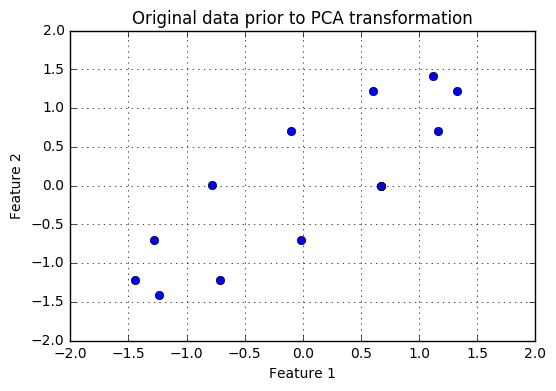

In [6]:
# First we create synthetic dataset
t=np.linspace(0,2*np.pi,13) 
A=1; B=1; x0=1.5; y0=1.5; angle=-45
x=A*np.cos(t+angle)+x0
y=B*np.sin(t)+y0
Xdata=np.column_stack([x,y])

# Next, we normalize the data
X=zscore(Xdata) 

# Plot the original data first (normalized)
plt.figure(1)
plt.plot(X[:,0],X[:,1],'bo') # re-plot the data
plt.xlabel('X1')
plt.ylabel('X2')

plt.title('Original data prior to PCA transformation')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.ylim(ymin=-2.0, ymax=2.0)
plt.xlim(xmin=-2, xmax=2)
plt.grid()
plt.show()

Then, we apply <i>PCA</i> function which returns eigenvectors, new transformation data and eigenvalues.
Then, we print eigenvalues associated with two PCs. The results indicate that the highest variance
is held in the first PCs with variance of 1.83 in comparison of second PC with variance of
0.16.

In [7]:
# Applying PCA
V,Ypca,D = PCA(X)            # perform PCA, where V, Ypca and D are
                             # eigenvectors, new transformation and eigenvalues,
                             # respectively
print "Eigenvalues D: %s" % D

Eigenvalues D: [ 1.83339613  0.16660387]


PCA transforms the original data space to PC space where the highest information is held by the first PC. PCA will be extremely beneficial when we deal with high dimensional data sets, so we can discard unneccesary PCs which contain very low variance. 
This type of problem will be tested on real chemical data in the final tutorial.
The following code is to plot the original data together with the new transformation data as well
as their eigenvector (PCs) as the direction. The produced Figure demonstrates how the original data (blue
dots) rotate to form new transformation data (red dots).

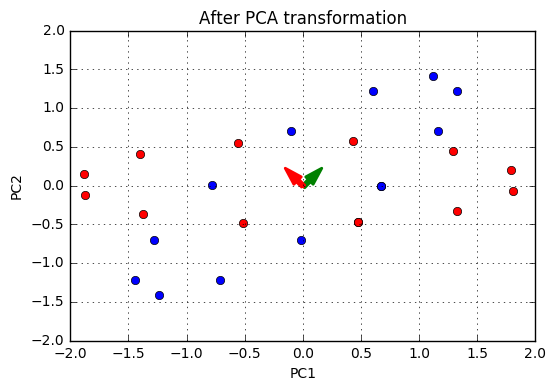

In [8]:
hV=V[:,0] # get the highest eigenvector
hD=D[0]   # get the highest eigenvalues
lV=V[:,1] # get the lowest eigenvector
lD=D[1]   # get the lowest eigenvalues

# We re-plot the original Figure
plt.figure(1)
plt.plot(X[:,0],X[:,1],'bo') # re-plot the data
plt.xlabel('X1')
plt.ylabel('X2')

# for plotting eigenvectors into 2-D map
X0=np.mean(X[:,0])
Y0=np.mean(X[:,1])
Uh1=hV[0]*np.sqrt(hD)
Uh2=hV[1]*np.sqrt(hD)
Ul1=lV[0]*np.sqrt(lD)
Ul2=lV[1]*np.sqrt(lD)

# Plot the eigenvectors
plt.quiver(X0, Y0, Uh1, Uh2, color='g', units='x',
               linewidths=(2,), edgecolors=('g'), headaxislength=5)
plt.quiver(X0, Y0, Ul1, Ul2, color='r', units='x',
               linewidths=(2,), edgecolors=('r'), headaxislength=5)

plt.plot(Ypca[:,0],Ypca[:,1],'ro') # plot the data after transformation
plt.title('After PCA transformation')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.ylim(ymin=-2.0, ymax=2.0)
plt.xlim(xmin=-2, xmax=2)
plt.grid()
plt.show()

## Tutorial 3: dimensionality reduction on chemical wine data
In this tutorial, we will use real experimental data, representing chemical wine data set. These data are the
results of a chemical analysis of wines grown in the same region in Italy but derived from three
different cultivars. The analysis determined the quantities of 13 constituents found in each of the
three types of wines, they are listed on the table below.

<table>
  <tr>
    <th>Feature No.</th>
    <th>Wine Chemical Composition</th> 
  </tr>
  <tr>
    <td>1</td>
    <td>Alcohol</td>
  </tr>
  <tr>
    <td>2</td>
    <td>Malic acid</td>
  </tr>
  <tr>
    <td>3</td>
    <td>Ash</td>
  </tr>
  <tr>
    <td>4</td>
    <td>Alcalinity of ash</td>
  </tr>
  <tr>
    <td>5</td>
    <td>Magnesium</td>
  </tr>
  <tr>
    <td>6</td>
    <td>Total phenols</td>
  </tr>
  <tr>
    <td>7</td>
    <td>Flavanoids</td>
  </tr>
  <tr>
    <td>8</td>
    <td>Nonavanoid phenols</td>
  </tr>
  <tr>
    <td>9</td>
    <td>Proanthocyanins</td>
  </tr>
  <tr>
    <td>10</td>
    <td>Color intensity</td>
  </tr>
  <tr>
    <td>11</td>
    <td>Hue</td>
  </tr>
  <tr>
    <td>12</td>
    <td>OD280/OD315 of diluted wines</td>
  </tr>
  <tr>
    <td>13</td>
    <td>Proline</td>
  </tr>
  <caption>Wine chemical composition*
  
  *Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science</caption>
</table><br>

The data files are named as <i>wineInputs.txt</i> and <i>wineOutputs.txt</i>, contains 178 samples. In this tutorial, the objective is to
reduce the dimensionality of redundant descriptors in the wine data by applying PCA. There is no exercise here, but this tutorial will be used later for the exercise on the following topics (Kmeans and Neural Network).

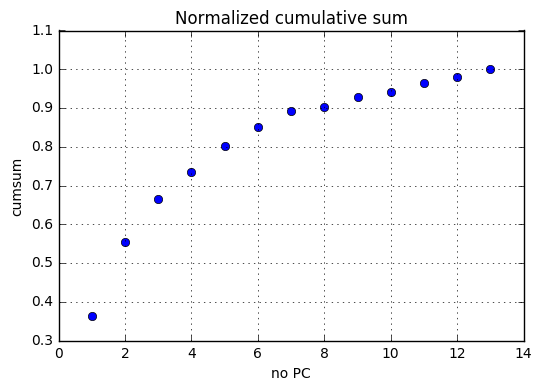

In [10]:
from pyPCA import PCA
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# We redefined zscore here
def zscore(X): # z-score uses to normalise the data.
    [nX,mX]=X.shape              # X has NxD
    XMean=np.mean(X,axis=0)      # take the mean of every row X
    XStd=np.std(X,axis=0,ddof=1) # take the std of every row X
    zX = X - np.kron(np.ones((nX,1)),XMean) # Z=[X - mX]
    Zscore = np.divide(zX,XStd)             # Zscore = Z/Xstd
    return Zscore

# First, we load input/output data
dataIn = np.genfromtxt('./data/wineInputs.txt', delimiter=',')
dataOut = np.genfromtxt('./data/wineOutputs.txt', delimiter=',')

dataOut=np.int_(dataOut) # Since the output is the classes, we convert the output data to be integer

X=zscore(dataIn) # Apply normalization

[V, Ypca ,D] = PCA(X) # Applying PCA

# The number of Pricipal Component (PC) = the number of eigenvalues (D)
noPC=np.linspace(1,len(D),len(D)) # Create the list of PCs 

# Normalized cumulative sum (cumsum)
# Here, we try to obtain the normalized of cumulative sum (cumsum) of eigenvalues
idc=np.divide(np.cumsum(D),np.sum(D)) 

# We plot normalized cumulative sum to understand the contributions of the obtained PCs
plt.figure(1)
plt.plot(noPC,idc,'bo') # re-plot the data
plt.xlabel('no PC')
plt.ylabel('cumsum')
plt.title('Normalized cumulative sum')
plt.grid()
plt.show()

# We will use this Figure for clustering later